In [1]:
import pandas as pd

In [2]:
df_main = pd.read_csv('data.csv')

df1 = df_main.copy()
df1.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,42.0,0.0,0.0,Yes,Private,Rural,84.60,27.0,smokes,0
1,Male,77.0,0.0,0.0,Yes,Private,Urban,94.68,33.6,Unknown,0
2,Female,57.0,0.0,0.0,Yes,Govt_job,Urban,110.52,28.5,Unknown,1
3,Male,8.0,0.0,0.0,No,children,Urban,118.66,16.1,Unknown,0
4,Female,66.0,0.0,0.0,Yes,Self-employed,Urban,101.45,29.3,Unknown,1


In [4]:
print(df1.nunique())
print('______'*20)
print(df1.dtypes)
print('______'*20)
print(df1.isnull().sum())
print('______'*20)

print(df1.shape)

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3889
bmi                   342
smoking_status          4
stroke                  2
dtype: int64
________________________________________________________________________________________________________________________
gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
________________________________________________________________________________________________________________________
gender                3
age                   1
hypertension          9
heart_disease        13
ever_married          4
work_t

In [5]:
print(df1.shape)

df1.dropna(inplace = True)

print(df1.shape)

(4981, 11)
(4906, 11)


In [6]:
print(df1.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [7]:
print(df1.dtypes)

gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['gender'] = le.fit_transform(df1['gender'])
df1['ever_married'] = le.fit_transform(df1['ever_married'])
df1['work_type'] = le.fit_transform(df1['work_type'])
df1['Residence_type'] = le.fit_transform(df1['Residence_type'])
df1['smoking_status'] = le.fit_transform(df1['smoking_status'])

print(df1.dtypes)

gender                 int32
age                  float64
hypertension         float64
heart_disease        float64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object


In [9]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df1.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,42.0,0.0,0.0,1,1,0,84.60,27.0,3,0
1,1,77.0,0.0,0.0,1,1,1,94.68,33.6,0,0
2,0,57.0,0.0,0.0,1,0,1,110.52,28.5,0,1
3,1,8.0,0.0,0.0,0,3,1,118.66,16.1,0,0


In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df1[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df1[['age', 'avg_glucose_level', 'bmi']])
df1.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,-0.062545,0.0,0.0,1,1,0,-0.474482,-0.218898,3,0
1,1,1.482195,0.0,0.0,1,1,1,-0.251349,0.752515,0,0
2,0,0.599487,0.0,0.0,1,0,1,0.099288,0.001878,0,1
3,1,-1.563148,0.0,0.0,0,3,1,0.279476,-1.823200,0,0


In [13]:
X = df1.drop('stroke', axis = 1)
y = df1['stroke']

print(X.shape)
print(y.shape)

(4906, 10)
(4906,)


In [14]:
# test_size = 0.2
# random_state = 42
import random

test_size = (random.randint(1, 50))/100
random_state = random.randint(1, 50)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4513, 10)
(4513,)
(393, 10)
(393,)


KNN

In [17]:
# model building
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn.pred = knn.predict(X_test)

In [18]:
X_train.dtypes

gender                 int32
age                  float64
hypertension         float64
heart_disease        float64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
dtype: object

In [19]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, knn.pred)
print(cm_knn)

[[379   2]
 [ 11   1]]


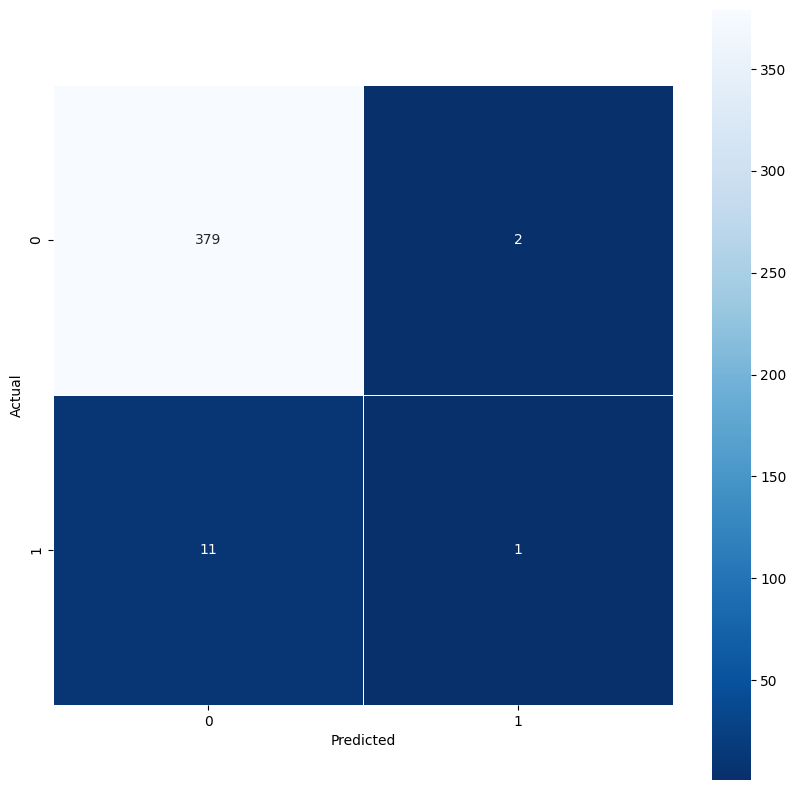

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 10))
sns.heatmap(cm_knn, annot = True, fmt = 'd', linewidths = 0.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       381
           1       0.33      0.08      0.13        12

    accuracy                           0.97       393
   macro avg       0.65      0.54      0.56       393
weighted avg       0.95      0.97      0.96       393



In [22]:
print((cm_knn[0][0] + cm_knn[1][1]) / len(y_test))

0.9669211195928753


In [23]:
print((379+1)/(379+1+11+2))

0.9669211195928753


ANN

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
142/142 [==============================] - 1s 3ms/step - loss: 0.3117 - accuracy: 0.9262 - val_loss: 0.1577 - val_accuracy: 0.9695
Epoch 2/10
142/142 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9477 - val_loss: 0.1512 - val_accuracy: 0.9695
Epoch 3/10
142/142 [==============================] - 0s 1ms/step - loss: 0.1780 - accuracy: 0.9479 - val_loss: 0.1312 - val_accuracy: 0.9695
Epoch 4/10
142/142 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9470 - val_loss: 0.1278 - val_accuracy: 0.9695
Epoch 5/10
142/142 [==============================] - 0s 1ms/step - loss: 0.1700 - accuracy: 0.9477 - val_loss: 0.1384 - val_accuracy: 0.9695
Epoch 6/10
142/142 [==============================] - 0s 1ms/step - loss: 0.1684 - accuracy: 0.9473 - val_loss: 0.1341 - val_accuracy: 0.9695
Epoch 7/10
142/142 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9481 - val_loss: 0.1317 - val_accuracy: 0.9695
Epoch 

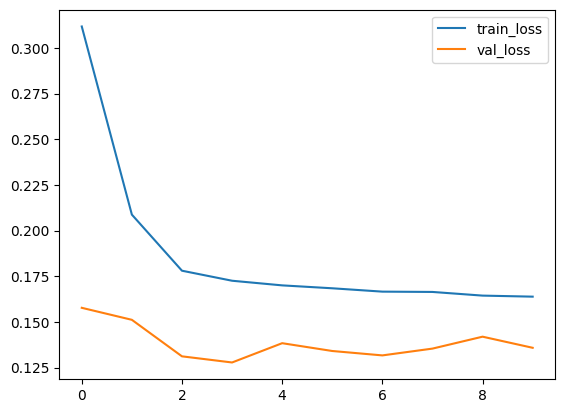

In [25]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()